# __How to train machine learning models and make predictions?__

Training machine learning is the process where the ML algorithm will learn from the input data and learn to give answers. 


## Types of machine learning

Machine learning as a whole is divided largely into 2 types:

1. __Supervised learning__ - You have a Y label to guide how the ML learns. The output is always about predicting something.

2. __Unsupervised learning__ - You don't have a Y label to guide the ML. There can be various outputs, like, clustering the datapoints, recommendation systems, reducing the dimensions of the data etc.

There is also a third type called __Reinforcement learning__, where the ML will learn by exploring an environment, get feedback and iteratively improve the next action.

The most commonly used type of ML problem however is Supervised learning, where you either predict a category (like a given customer churned or not) or you predict a quantity (like how much sales is expected next month). The first type is a __classification problem__ and the latter is called __regression problems__.

## What are Dependent and independent variables?

In the problem with predicting customer churn, we want to predict the value of __'Exited'__ column. We intend to use the other columns (variables) present in the dataset to predict 'Exited'. 

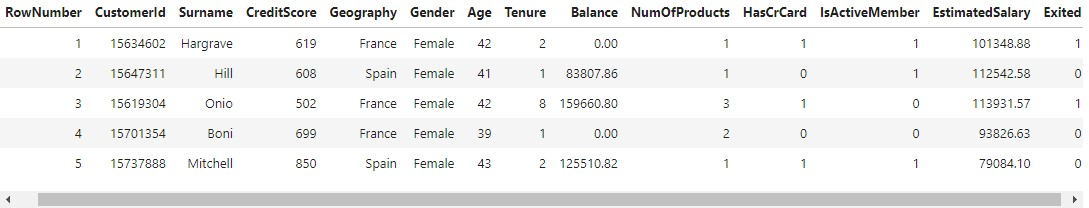


The column that you want to predict is also called as the __dependent variable__. It is also known by various names such as the __response variable__, __the label__ or simply as the __Y__ variable.

Then what about the other columns present in the data?

The other columns that may be _used_ to predict the __dependent variable__ are called the __independent variables__. They are also known by various names such as __predictors__, __explanatory variables__, __the influencers__, __covariates__ or simply as the __X variables__.

## What kind of algorithms to use to train a ML model?

For predictive modeling problems, the algorithm to use depends upon the type of variable you want to predict.
If the dependent variable is:

1. __Categorical__. Then it's a classification problem. You can use ML algorithms for classification.
2. __Continuous__. Then it's a regression problem. You can use ML algorithms for regression.

Also note, many of the algorithms such as decision trees, random forests etc can be used for classification as well as regression. Though you can use the same API / python class, internally the algorithm works differently according to the type of the varible (classification / regression).

__Classification Algorithms__

1. Logistic Regression
2. Naive Bayes Classifier
3. Regularized logistic regression
4. Linear and Quadratic Discriminany Analysis

__Regression Algorithms__

1. Linear Regression
2. Quantile Regression
3. Robust Regression
4. Regularized version of Linear regression like LASSO, Ridge and ElasticNet regression
5. Robust Regression
6. Polynomial Regression

__Classification and Regression__

1. Decision Trees
2. Support Vector machines
3. Bagging algorithms like Random Forest, ExtraTrees
4. Boosting algorithms like AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.
5. Deep Neural Networks

Above is not a complete list. There are so many more, but above are the most common often used ones for their effectiveness.

## Generative vs Discriminative models

While we are talking about the types of machine learning algorithms, supervised learning can also be classified as either:

1. Generative models
2. Discriminative models

Well, what's the difference?

While both types of models have a same goal, say predicting the class of the label, the way they approach to solve it is different.

The main difference is: __Discriminative models__ try to find a decision boundary that demarcates what class a given datapoint might belong to. 

Whereas, __Generative models__ try to model how the data of the classes is distributed.

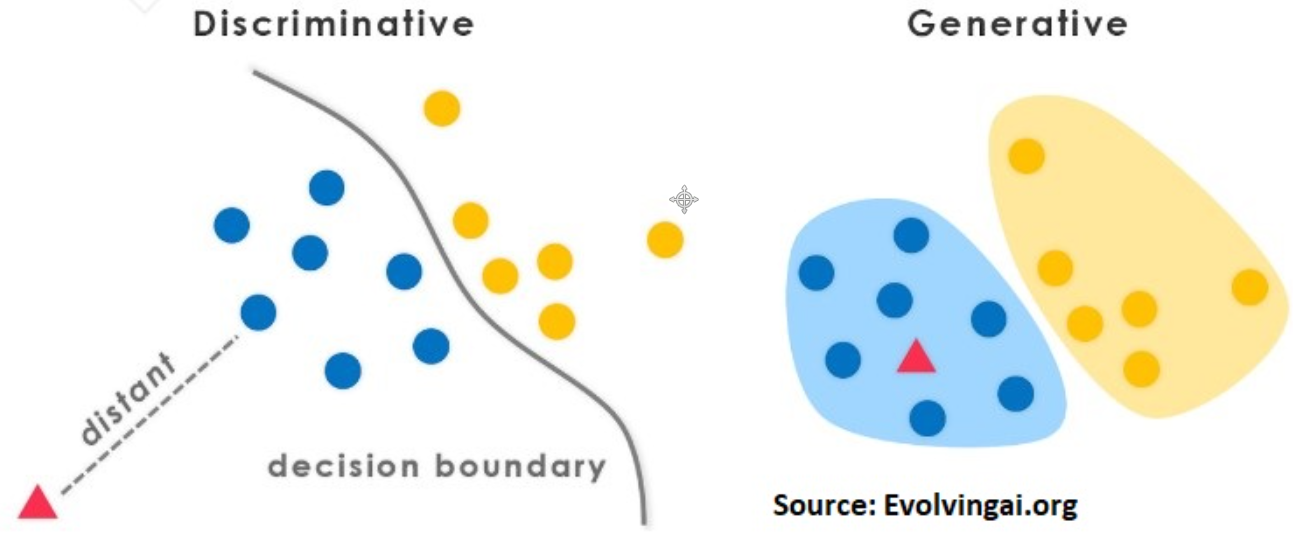

## Load the Datasets and packages

Let's build a ML model to predict the 'Exited' class of the [Churn_Modeling](https://raw.githubusercontent.com/selva86/datasets/master/Churn_Modelling.csv) dataset.

Before you import the libraries below, I assume you've [setup the python ML environment]().

__Import the libraries__

In [74]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   xgboost import XGBClassifier
from   lightgbm import LGBMClassifier

# Set pandas options to show more rows and columns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
%matplotlib inline

__Import the dataset__

In [75]:
import pandas as pd
file_path = "https://raw.githubusercontent.com/selva86/datasets/master/Churn_Modelling.csv"
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


__Target class and ML algo to use__

In [76]:
# Target class name
input_target_class = "Exited"

# Machine learning algorithm
input_ml_algo = 'RandomForestClassifier' # choose the ML algorithm from 'LogisiticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier' and LGBMClassifier'

## Drop non informative columns

In [78]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Create Training and Test Datasets

In [79]:
# Prepare X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Encode Categorical Features

We can go for either One-hot encoding or Target encoding. Let's do target encoding for this one.

We will use `category_encoders` package to do the target encoding. 
``` 
!pip install category_encoders==2.2.2
```

Ref:

1. [Github for the project](https://github.com/scikit-learn-contrib/category_encoders)
2. [Useful blog on target encoding](https://maxhalford.github.io/blog/target-encoding/)

Let's target encode the 'Geography' and 'Gender' columns.

In [80]:
# Label Encoding using `cat.codes`function\
df['Exited'] = df['Exited'].astype(int)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
# Define the TargetEncoder
from category_encoders import TargetEncoder

__Target encode Geography__

In [82]:
# Target encoding
encoder = TargetEncoder()
geo_values_train = encoder.fit_transform(X = X_train['Geography'], y = y_train)
geo_values_test = encoder.transform(X = X_test['Geography'])

# rename
geo_values_train.columns = ['Geo_target']
geo_values_test.columns = ['Geo_target']
geo_values_train.head(3)

,Geo_target
2694,0.318227
5140,0.160991
2568,0.318227


__Target encode Gender__

In [83]:
# Target encoding
encoder = TargetEncoder()
gender_values_train = encoder.fit_transform(X = X_train['Gender'], y = y_train)
gender_values_test = encoder.transform(X = X_test['Gender'])

# rename
gender_values_train.columns = ['Gender_target']
gender_values_test.columns = ['Gender_target']
gender_values_train.head(3)

,Gender_target
2694,0.163757
5140,0.249314
2568,0.249314


__Drop the string forms of the categorical variables__

In [84]:
X_train = X_train.drop(["Geography", "Gender"], axis=1)
X_test = X_test.drop(["Geography", "Gender"], axis=1)
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2694,628,29,3,113146.98,2,0,1,124749.08
5140,626,29,4,105767.28,2,0,0,41104.82
2568,612,47,6,130024.87,1,1,1,45750.21
3671,646,52,6,111739.40,2,0,1,68367.18
7427,714,33,8,122017.19,1,0,0,162515.17


__Concatenate with dataframe__

In [85]:
# Concatenating with dataframe
X_TRAIN = pd.concat([X_train, geo_values_train, gender_values_train], axis = 1)
X_TEST = pd.concat([X_test, geo_values_test, gender_values_test], axis = 1)
X_TEST.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_target,Gender_target
9953,550,47,2,0.00,2,1,1,97057.28,0.160991,0.163757
3850,680,34,3,143292.95,1,1,0,66526.01,0.160991,0.163757
4962,531,42,2,0.00,2,0,1,90537.47,0.160991,0.249314
3886,710,34,8,147833.30,2,0,1,1561.58,0.318227,0.163757
5437,543,30,6,73481.05,1,1,1,176692.65,0.318227,0.163757
8517,688,20,8,137624.40,2,1,1,197582.79,0.160991,0.163757
2041,840,39,1,94968.97,1,1,0,84487.62,0.160991,0.249314
1989,695,28,0,96020.86,1,1,1,57992.49,0.168522,0.163757
1933,666,74,7,105102.50,1,1,1,46172.47,0.318227,0.163757
9984,602,35,7,90602.42,2,1,1,51695.41,0.318227,0.163757


## Training the ML model

Let's now start training the ML model.

In [86]:
# Select the algorithm according to the input provided
if input_ml_algo == 'DecisionTreeClassifier':
    model = DecisionTreeClassifier()
elif input_ml_algo == 'RandomForestClassifier':
    model = RandomForestClassifier()
elif input_ml_algo == 'XGBClassifier':
    model = XGBClassifier()
elif input_ml_algo == 'LGBMClassifier':
    model = LGBMClassifier()

In [88]:
# Training the model:
model.fit(X_TRAIN, y_train)
model

RandomForestClassifier()

## Feature Importances

Feature importances show how important each of the features were in the machine learning model.

In [96]:
for name, fi in zip(X_train.columns, model.feature_importances_):
    print(name.ljust(20), round(fi, 4))

CreditScore          0.1446
Age                  0.2315
Tenure               0.0804
Balance              0.1439
NumOfProducts        0.1296
HasCrCard            0.019
IsActiveMember       0.0439
EstimatedSalary      0.1479


## Predict on Test Data

Get the predictions from the model on testing data

In [99]:
# Predict class for test dataset
y_pred = model.predict(X_TEST)
y_pred[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

__Print prediction probability scores__

In [104]:
# Predict probability for test dataset
y_pred_prob = model.predict_proba(X_TEST)
y_pred_prob[:10]

array([[0.94, 0.06],
       [0.93, 0.07],
       [0.96, 0.04],
       [0.94, 0.06],
       [0.94, 0.06],
       [0.94, 0.06],
       [0.71, 0.29],
       [0.96, 0.04],
       [0.64, 0.36],
       [1.  , 0.  ]])

This gives the probability of both Y=0 and Y=1. Let's extract probability of churning alone, that is P(Y=1).

In [110]:
y_prob = [x[1] for x in y_pred_prob]
print("Y predicted : ".ljust(25),y_pred[30:40])
print("Y probability predicted : ".ljust(25),y_prob[30:40])

Y predicted :             [0 0 0 1 0 0 0 1 0 0]
Y probability predicted :  [0.06, 0.05, 0.01, 0.89, 0.14, 0.11, 0.49, 0.62, 0.03, 0.5]


## Model performance evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [112]:
# Define a function to compute various evaluation metrics 
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show() 


 Accuracy Score : 
  0.8675

 AUC Score : 
 0.8677541712591692

 Confusion Matrix : 
  [[1541   44]
 [ 221  194]]

 Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.82      0.47      0.59       415

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000


 ROC curve : 



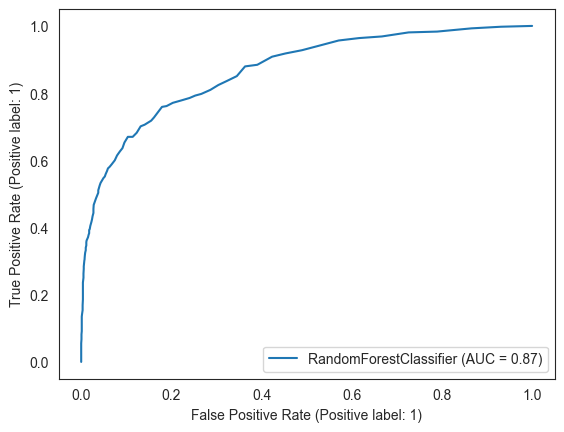

In [113]:
compute_evaluation_metric(model, X_TEST, y_test, y_pred, y_prob)

The `compute_evaluation_metric()` function prints various evaluation metrics such as the accuracy, Area under the ROC curve, Precision, Recall and F1 Score.

What are these terms practically?

- __Accuracy__ is the percentage of predicted values that matches with actual.

- __Area under the ROC curve__ (AUROC) varies between 0 to 100. If a model has an ROC more than 50, then it is an informative model. The higher the ROC curve, the better is the model.

- __Precision__ is the proportion of datapoints that the model marked as 1 (churned) and was indeed 1 (churned) in truth.

- __Recall__ is the proportion of all 1's in the dataset that were correctly predicted by the model. Suppose, if a model predicted only a small portion of all the 1's in the entire dataset as 1. It will have a high precision but low recall. So, it is very much possible that a model may have higher precision but still not desirable.

- __F1 Score__ is a formula that combines both Precision and Recall. A model that has a higher F1 score is what we want finally.



The higher the values of these scores, the better is your model.

So, that's how you can train a machine learning model and view it's performance. 

But in this example, we skipped a bunch of steps and went straight to the training part. Let' review some of the activities you'd do before training a ML model.

## What activities to do before training a ML model?

Before you build the ML models, you would typically perform the following activities.

1. Define the ML problem
2. Setup Python Environment for ML
3. Import the necessary packages and the data.
4. Clean the data - such as formatting the columns appropriately, [optimizing the dataframe], make sure column headers are proper (lowercase, no space, meaningful).
5. Perform exploratory data analysis (EDA) - Univariate and Bivariate analysis
6. Handle missing values
7. Detect outliers and treat them if appropriate.
8. Encode categorical features
9. Engineer new features
10. Train Test Split the dataset
11. Scale the features if required by ML algorithm
12. Train the ML model  <<-- we are here.
13. Do cross validation such as K-Fold cross validation
14. Handle class imbalance if appropriate
15. Tune the model hyperparameters
16. Save and load the ML model.
